In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# orders_qu.csv
url = "https://drive.google.com/file/d/13Q3ph-DilPnG6KzhAoDCfbk8V1hth1SI/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1WcmDF4OS9aa0gUGvGIlETjvGmk-0RQLA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [5]:
o_df=orders_qu.copy()
ol_df = orderlines_qu.copy()
pr_df=products_cl.copy()


In [71]:
o_df

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
40980,527042,2018-03-14 11:47:50,18.98,Completed
40981,527070,2018-03-14 11:50:48,24.97,Completed
40982,527074,2018-03-14 11:51:42,24.97,Completed
40983,527096,2018-03-14 11:58:40,34.96,Completed


In [6]:

ol_df['unit_price'] = pd.to_numeric(ol_df['unit_price'], errors='coerce')
ol_df['date'] = pd.to_datetime(ol_df['date'])


ol_df


,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [7]:
pr_df['price'] = pd.to_numeric(pr_df['price'], errors='coerce')
pr_df


,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392


In [8]:
category_type_df = products_cl.copy()
category_type_df["category"] = "others"
category_type_df.head()

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,others
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,others
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,others
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,others
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,others


**Making Catagories**

In [9]:

category_type_df.loc[category_type_df["type"].isin(["118692158","5,39E+11"]),"category"]="apple imac"
category_type_df.loc[(category_type_df["type"].isin(["12175397","11935397","1364","12585395","1433","12215397","57445397","12655397"])),"category"]="storage"
category_type_df.loc[category_type_df["type"] .isin(["1298","11905404","12635403","11865403","1325","1,02E+12","13555403","13615399","1216",'1387','1392','1229','']),"category"]="accesories"
category_type_df.loc[category_type_df["type"] == "1,44E+11","category"]="spare parts"
category_type_df.loc[category_type_df["type"].isin(["1515","12995397","1334","57445397","1230"]),"category"]="adapter"
category_type_df.loc[category_type_df["type"] == "2449","category"]="apple watch"
category_type_df.loc[category_type_df["type"] == "2158","category"]="apple macbook"
category_type_df.loc[category_type_df["type"].isin(["1282","5,74E+15",'11821715']),"category"]="smart_phone"
category_type_df.loc[category_type_df["type"].isin(["13835403","1296","5384","5398","1405"]),"category"]="peripheral_devices"
category_type_df.category.value_counts()
filtered_df = category_type_df[category_type_df['category'] == 'others']
filtered_df
unique_types_count = filtered_df.groupby('type').size().reset_index(name='product_count').nlargest(n=5, columns='product_count')

# Merge with the original dataframe to get product names
top_types_df = pd.merge(unique_types_count, filtered_df[['type', 'name','category']], on='type', how='left').drop_duplicates()

top_types_df

,type,product_count,name,category
0,24885185,67,Apple Watch Sport Silver 38mm white sports strap,others
1,24885185,67,Apple Watch Sport Silver Strap 38mm Albaricoque,others
2,24885185,67,Apple Watch Sport Silver Strap 38mm Royal Blue,others
3,24885185,67,Apple Watch Sport Silver Strap 38mm Yellow,others
4,24885185,67,Apple Watch Sport Lavender Rose Gold 38mm Strap,others
...,...,...,...,...
302,9094,50,Netgear Arlo Wire-Free Security System 1 Camer...,others
303,9094,50,Netgear Arlo Wire-Free Security System 2 camer...,others
304,9094,50,Netgear Arlo Wire-Free Security System 4 HD ca...,others
305,9094,50,Additional Arlo Pro Netgear Security Camera,others


**Declare Discounts**

In [10]:
merged_df = pd.merge(ol_df, category_type_df[['sku', 'price','category']], left_on='sku', right_on='sku', how='left')
merged_df['discount_amount'] = merged_df['price'] - merged_df['unit_price']
merged_df.loc[merged_df['unit_price'] >= merged_df['price'], 'discount_amount'] = 0
merged_df['date']=pd.to_datetime(merged_df['date']).dt.to_period('M')
discount_trend = merged_df.groupby(['category','date'])['discount_amount'].sum().reset_index()
discount_trend



,category,date,discount_amount
0,accesories,2017-01,44840.68
1,accesories,2017-02,12118.55
2,accesories,2017-03,901.90
3,accesories,2017-04,6175.64
4,accesories,2017-05,5594.34
...,...,...,...
114,storage,2017-11,81331.43
115,storage,2017-12,41446.89
116,storage,2018-01,45521.51
117,storage,2018-02,33665.32


**bar graph showing the trend of discount usage over time (two years) based on categories**

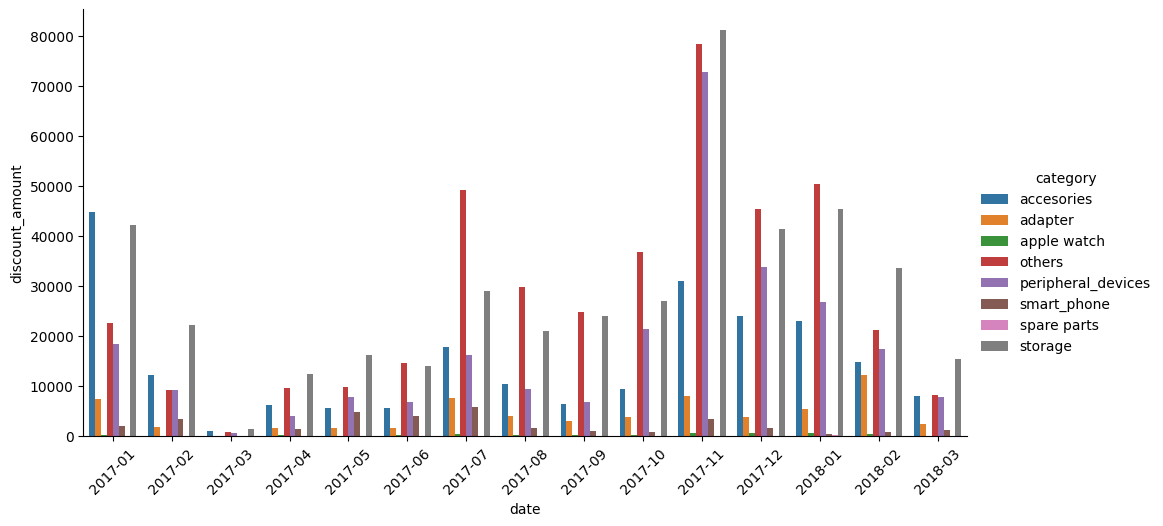

In [11]:
sns.catplot(kind="bar",
            data=discount_trend,
            x="date",
            y="discount_amount",
            hue="category",
            ci=None,
            aspect=2
           )

plt.xticks(rotation=45)

plt.show()

**`[relationship between discount amount and increase in sales]`**

In [12]:
merged_df2 = pd.merge(category_type_df, ol_df, left_on='sku', right_on='sku')
merged_df2['date'] = pd.to_datetime(merged_df2['date'])
merged_df2['date'] = merged_df2['date'].dt.date
merged_df2['discount_amount'] = merged_df2['price'] - merged_df2['unit_price']
merged_df2.loc[merged_df['unit_price'] >= merged_df2['price'], 'discount_amount'] = 0

daily_sales = merged_df2.groupby('date')['unit_price'].sum().reset_index()
daily_discount = merged_df2.groupby('date')['discount_amount'].sum().reset_index()
daily_discount




,date,discount_amount
0,2017-01-01,2545.05
1,2017-01-02,4735.78
2,2017-01-03,3246.04
3,2017-01-04,1537.84
4,2017-01-05,5895.24
...,...,...
433,2018-03-10,1419.97
434,2018-03-11,1481.60
435,2018-03-12,3075.24
436,2018-03-13,1783.30


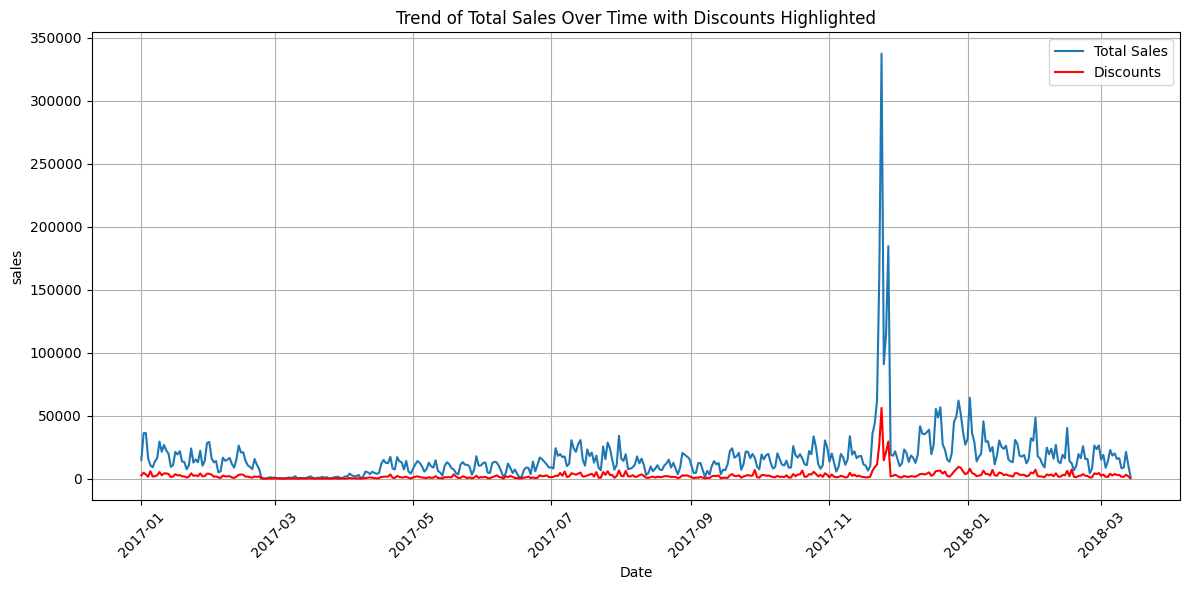

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='unit_price', data=daily_sales, label='Total Sales')
sns.lineplot(x='date', y='discount_amount', data=daily_discount, label='Discounts', color='r')

plt.title('Trend of Total Sales Over Time with Discounts Highlighted')
plt.xlabel('Date')
plt.ylabel('sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:

merged_df3 = pd.merge(ol_df, category_type_df[['sku', 'price','category']], left_on='sku', right_on='sku', how='left')
merged_df3['discount_amount'] = merged_df3['price'] - merged_df3['unit_price']
merged_df3.loc[merged_df3['unit_price'] >= merged_df3['price'], 'discount_amount'] = 0
merged_df3['discount_percentage'] = (merged_df3['discount_amount']/ merged_df3['price']) * 100

sns.scatterplot(x='discount_percentage', y='unit_price', data=merged_df3)
plt.title('Relationship between Discount Percentage and Sales')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Sales ')
plt.grid(True)
plt.show()


NameError: name 'merged_df3' is not defined

In [14]:
merged_df3.loc[merged_df3['price'] == merged_df3['price'].max()]
discount_sales_relation

NameError: name 'discount_sales_relation' is not defined

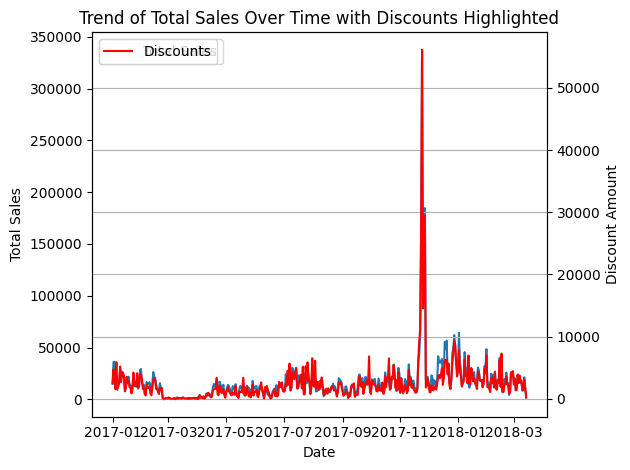

In [ ]:
ax1 = sns.lineplot(x='date', y='unit_price', data=daily_sales, label='Total Sales')

# Create another y-axis to display discount amount
ax2 = ax1.twinx()
sns.lineplot(x='date', y='discount_amount', data=daily_discount, ax=ax2, label='Discounts', color='r')

# Set labels and titles
ax1.set_title('Trend of Total Sales Over Time with Discounts Highlighted')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales')
ax2.set_ylabel('Discount Amount')

# Show legend for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
merged_df3 = pd.merge(ol_df, category_type_df[['sku', 'price','category']], left_on='sku', right_on='sku', how='left')
merged_df3['discount_amount'] = merged_df3['price'] - merged_df3['unit_price']
merged_df3.loc[merged_df3['unit_price'] >= merged_df3['price'], 'discount_amount'] = 0

merged_df3['discount_percentage'] = (merged_df3['discount_amount']/ merged_df3['price']) * 100
#order_counts_mean = merged_df3.groupby('discount_percentage')['sku'].nunique()
order_counts_mean = merged_df3.groupby('sku')['discount_percentage'].mean()

sns.scatterplot(x='discount_percentage', y='sku', data=order_counts_mean)
plt.title('Relationship between Discount Percentage and Sales')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Sales ')
plt.grid(True)
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Axes: xlabel='sku', ylabel='discount_percentage'>

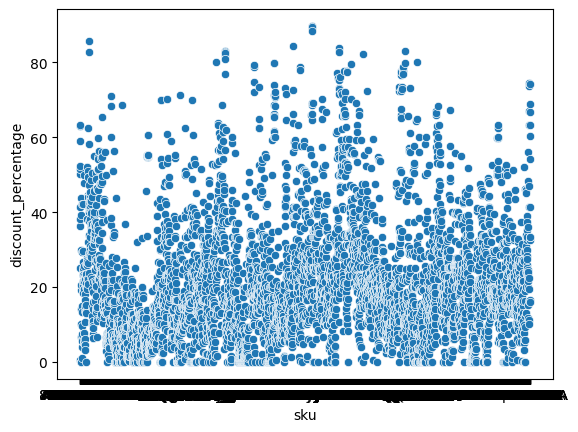

In [37]:
order_counts_mean = merged_df3.groupby('sku')['discount_percentage'].mean()
order_counts_mean
sns.scatterplot(x=order_counts_mean.index, y=order_counts_mean)

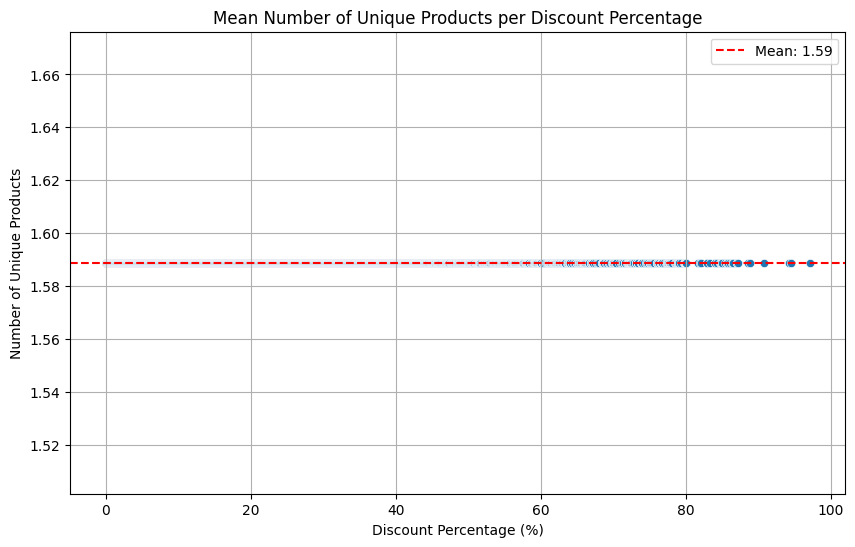

In [26]:
order_counts_mean = merged_df3.groupby('discount_percentage')['sku'].nunique().reset_index(name='unique_skus')
order_counts_mean['mean'] = order_counts_mean['unique_skus'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='mean', data=order_counts_mean)
plt.axhline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.title('Mean Number of Unique Products per Discount Percentage')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Number of Unique Products')
plt.grid(True)
plt.legend()
plt.show()

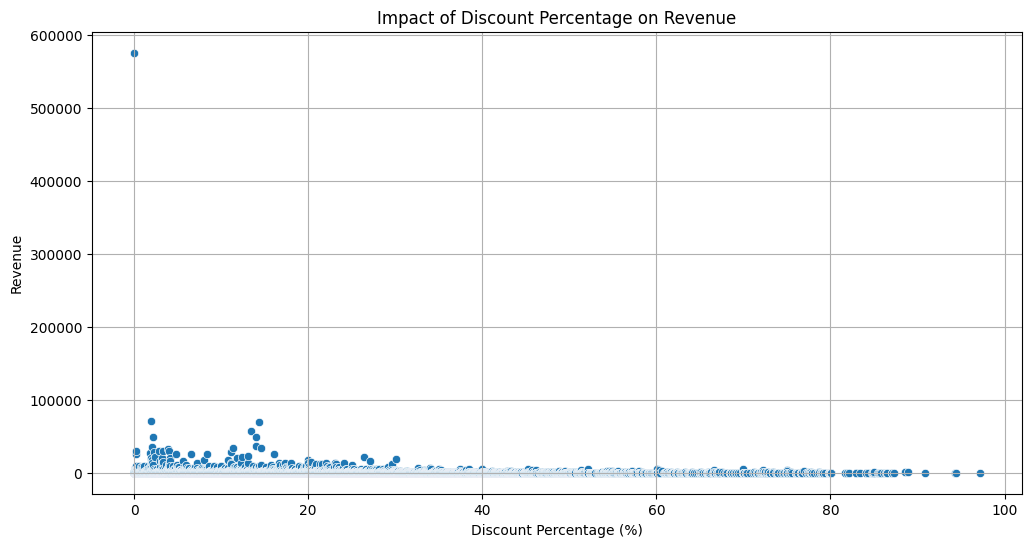

In [40]:
merged_df3['revenue'] = merged_df3['unit_price'] * merged_df3['product_quantity']
revenue_by_discount = merged_df3.groupby('discount_percentage')['revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(x='discount_percentage', y='revenue', data=revenue_by_discount)
plt.title('Impact of Discount Percentage on Revenue')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

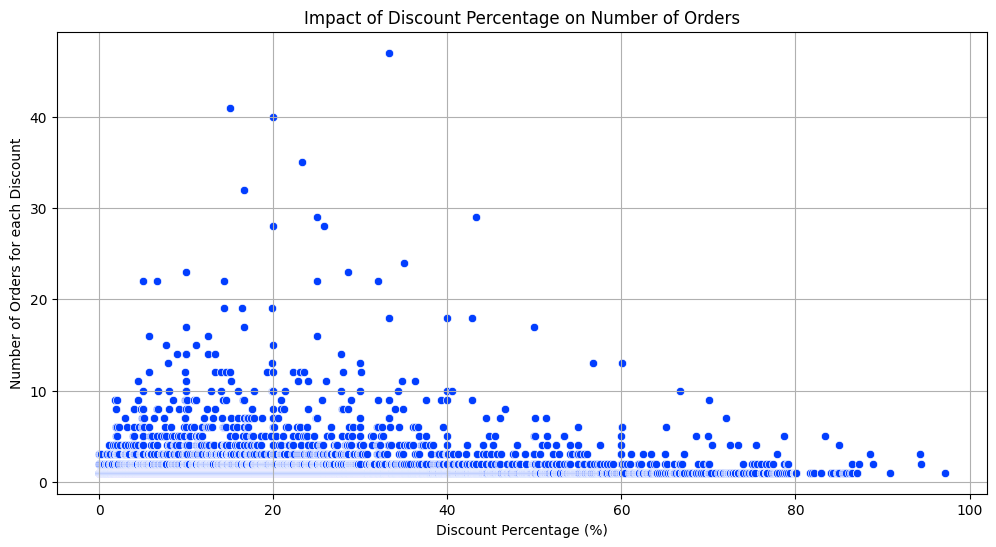

In [80]:
order_counts = merged_df3.groupby('discount_percentage')['sku'].nunique().reset_index(name='unique_orders')
order_counts = order_counts.iloc[1:]

plt.figure(figsize=(12, 6))
sns.set_palette('bright')
sns.scatterplot(x='discount_percentage', y='unique_orders', data=order_counts, palette='bright')
plt.title('Impact of Discount Percentage on Number of Orders')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Number of Orders for each Discount')
plt.grid(True)
plt.show()

In [44]:
order_counts

,discount_percentage,unique_orders
0,0.000000,760
1,0.001391,1
2,0.002747,1
3,0.004762,1
4,0.005495,1
...,...,...
8844,88.893830,2
8845,90.821705,1
8846,94.295926,3
8847,94.452474,2


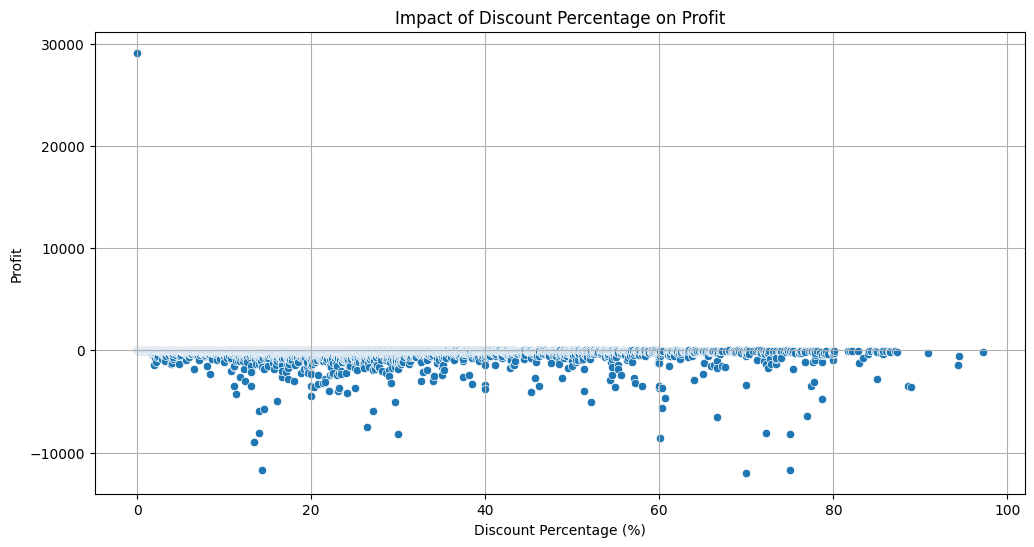

In [42]:
merged_df3['cost'] = merged_df3['price'] * merged_df3['product_quantity']
merged_df3['profit'] = merged_df3['revenue'] - merged_df3['cost']

profit_by_discount = merged_df3.groupby('discount_percentage')['profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='discount_percentage', y='profit', data=profit_by_discount)
plt.title('Impact of Discount Percentage on Profit')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Profit')
plt.grid(True)
plt.show()